In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from sklearn.model_selection import train_test_split
from time import time
import numpy as np
from matplotlib import pyplot as plt

In [5]:

def create_model():
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

def train_model(optimizer_name, lr=0.01, X_train=None, y_train=None, X_val=None, y_val=None, epochs=50):
  start_time = time()
  batch_size = None
  model = create_model()
  if optimizer_name == "SGD":
    optimizer = SGD(lr=lr, weight_decay=0, momentum=0.0)
    batch_size = 1
  elif optimizer_name == "Mini-batch SGD":
    optimizer = SGD(lr=lr, weight_decay=0, momentum=0.0)
    batch_size = 64
  elif optimizer_name == "batch SGD":
    optimizer = SGD(lr=lr, weight_decay=0, momentum=0.0)
  elif optimizer_name == "Mini-batch SGD with Decay":
    optimizer = SGD(lr=lr, weight_decay=1e-6, momentum=0.0)
  elif optimizer_name == "Mini-batch SGD with Decay and Momentum":
    optimizer = SGD(lr=lr, weight_decay=1e-6, momentum=0.9)
  elif optimizer_name == "Adam":
    optimizer = Adam(lr=lr)
  elif optimizer_name == "RMSprop":
    optimizer = RMSprop(lr=lr)
  else:
    raise ValueError(f"Invalid optimizer name: {optimizer_name}")
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=5)
  history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks=[early_stopping])
  end_time = time()
  training_time = end_time - start_time

  # Track best model based on validation accuracy
  best_model = model
  best_val_acc = max(history.history['val_accuracy'])
  for i in range(len(history.history['val_accuracy'])):
    if history.history['val_accuracy'][i] == best_val_acc:
      best_model = model.get_weights()
      break

  # Plot learning curves
  plt.plot(history.history['loss'], label=f'Training Loss ({optimizer_name})')
  plt.plot(history.history['val_loss'], label=f'Validation Loss ({optimizer_name})')
  plt.plot(history.history['accuracy'], label=f'Training Accuracy ({optimizer_name})')
  plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({optimizer_name})')
  plt.title(f'Learning Curves ({optimizer_name})')
  plt.xlabel('Epoch')
  plt.ylabel('Loss/Accuracy')
  plt.legend()
  plt.show()

  return history, training_time, best_model

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)


Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7156 - accuracy: 0.8081 - val_loss: 0.3613 - val_accuracy: 0.8991
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3255 - accuracy: 0.9056 - val_loss: 0.2916 - val_accuracy: 0.9158
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2710 - accuracy: 0.9218 - val_loss: 0.2610 - val_accuracy: 0.9261
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2349 - accuracy: 0.9327 - val_loss: 0.2339 - val_accuracy: 0.9326
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2085 - accuracy: 0.9409 - val_loss: 0.2105 - val_accuracy: 0.9386
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1869 - accuracy: 0.9465 - val_loss: 0.1929 - val_accuracy: 0.9414
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1701 - accuracy: 0.9522 - val_loss: 0.1765 - val_accuracy:

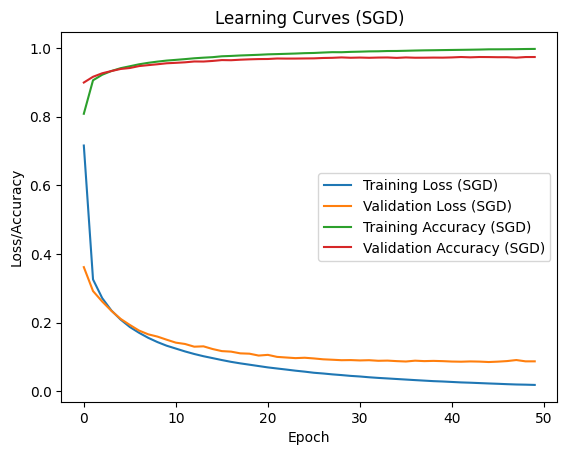

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7060 - accuracy: 0.8167 - val_loss: 0.3489 - val_accuracy: 0.9034
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3199 - accuracy: 0.9089 - val_loss: 0.2786 - val_accuracy: 0.9209
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9240 - val_loss: 0.2439 - val_accuracy: 0.9309
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2333 - accuracy: 0.9337 - val_loss: 0.2236 - val_accuracy: 0.9369
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2081 - accuracy: 0.9410 - val_loss: 0.2035 - val_accuracy: 0.9416
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1885 - accuracy: 0.9461 - val_loss: 0.1879 - val_accuracy: 0.9457
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1718 - accuracy: 0.9507 - val_loss: 0.1749 - val_accuracy:

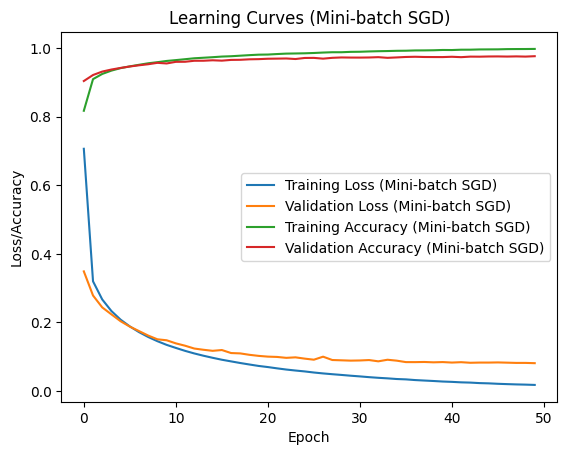

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7055 - accuracy: 0.8168 - val_loss: 0.3537 - val_accuracy: 0.9005
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3183 - accuracy: 0.9086 - val_loss: 0.2839 - val_accuracy: 0.9179
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2653 - accuracy: 0.9240 - val_loss: 0.2437 - val_accuracy: 0.9298
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2323 - accuracy: 0.9342 - val_loss: 0.2232 - val_accuracy: 0.9341
Epoch 5/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2063 - accuracy: 0.9418 - val_loss: 0.2000 - val_accuracy: 0.9395
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1862 - accuracy: 0.9482 - val_loss: 0.1874 - val_accuracy: 0.9435
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1691 - accuracy: 0.9527 - val_loss: 0.1741 - val_accuracy:

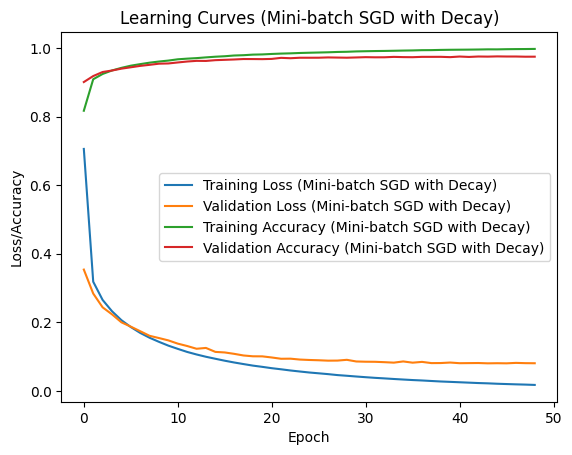

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.9067 - val_loss: 0.1614 - val_accuracy: 0.9509
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1285 - accuracy: 0.9622 - val_loss: 0.1134 - val_accuracy: 0.9638
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0917 - accuracy: 0.9722 - val_loss: 0.1013 - val_accuracy: 0.9670
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0701 - accuracy: 0.9785 - val_loss: 0.0901 - val_accuracy: 0.9722
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0550 - accuracy: 0.9824 - val_loss: 0.0884 - val_accuracy: 0.9736
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0890 - val_accuracy: 0.9728
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0359 - accuracy: 0.9882 - val_loss: 0.0945 - val_accuracy:

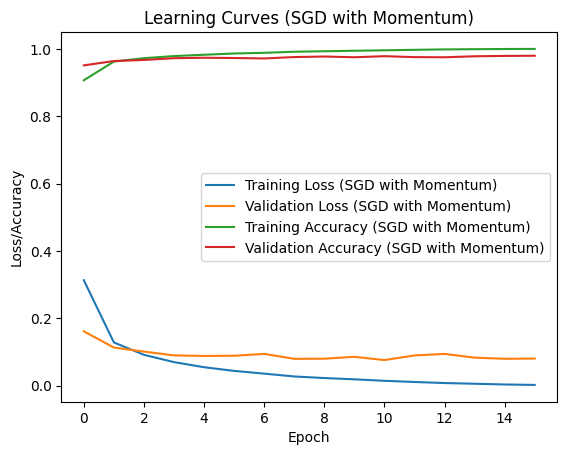

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3202 - accuracy: 0.9045 - val_loss: 0.1708 - val_accuracy: 0.9492
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1371 - accuracy: 0.9592 - val_loss: 0.1155 - val_accuracy: 0.9642
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0961 - accuracy: 0.9714 - val_loss: 0.0974 - val_accuracy: 0.9687
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0730 - accuracy: 0.9777 - val_loss: 0.0858 - val_accuracy: 0.9725
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0581 - accuracy: 0.9823 - val_loss: 0.1004 - val_accuracy: 0.9679
Epoch 6/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0763 - val_accuracy: 0.9762
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.0964 - val_accuracy:

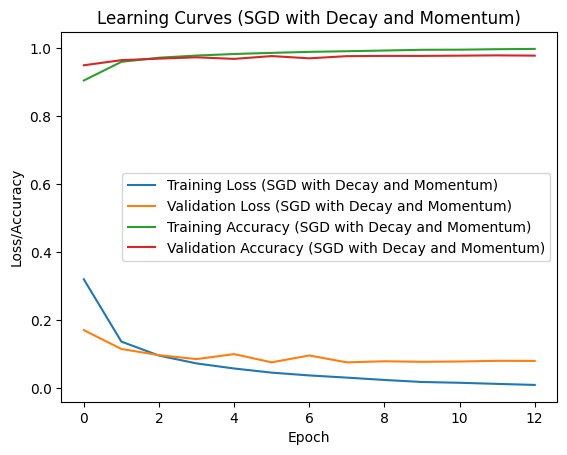

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2685 - accuracy: 0.9215 - val_loss: 0.1393 - val_accuracy: 0.9548
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1111 - accuracy: 0.9664 - val_loss: 0.1025 - val_accuracy: 0.9668
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0768 - accuracy: 0.9772 - val_loss: 0.0921 - val_accuracy: 0.9707
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0589 - accuracy: 0.9819 - val_loss: 0.0943 - val_accuracy: 0.9714
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0438 - accuracy: 0.9854 - val_loss: 0.0944 - val_accuracy: 0.9720
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0859 - val_accuracy: 0.9758
Epoch 7/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0899 - val_accuracy:

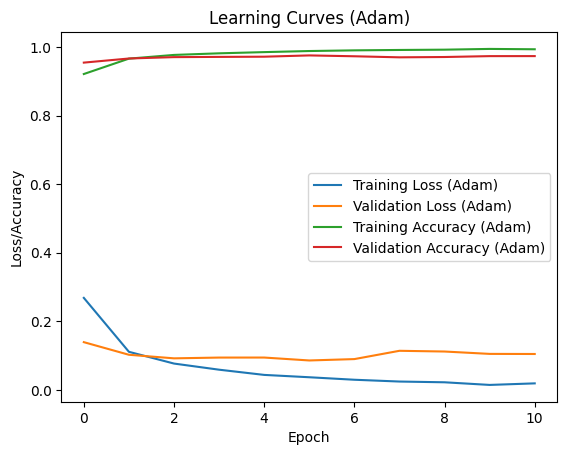

Epoch 1/50
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2689 - accuracy: 0.9206 - val_loss: 0.1653 - val_accuracy: 0.9500
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1211 - accuracy: 0.9642 - val_loss: 0.1136 - val_accuracy: 0.9652
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0870 - accuracy: 0.9753 - val_loss: 0.0918 - val_accuracy: 0.9719
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0676 - accuracy: 0.9802 - val_loss: 0.0859 - val_accuracy: 0.9726
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0548 - accuracy: 0.9834 - val_loss: 0.0947 - val_accuracy: 0.9729
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0454 - accuracy: 0.9870 - val_loss: 0.0972 - val_accuracy: 0.9743
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0392 - accuracy: 0.9891 - val_loss: 0.0921 - val_accuracy:

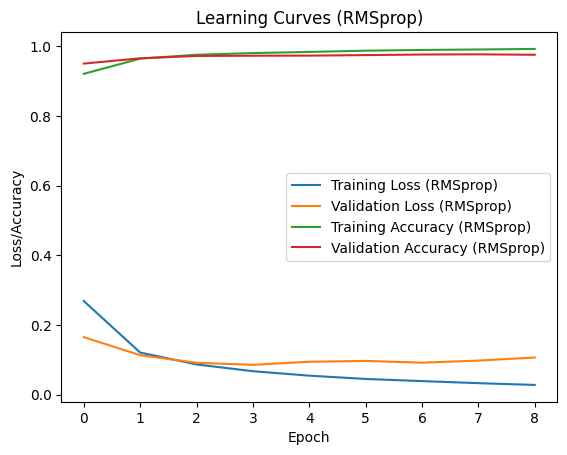

Training Time Comparison:
SGD: 144.39 seconds
Mini-batch SGD: 157.92 seconds
Mini-batch SGD with Decay: 175.02 seconds
SGD with Momentum: 67.30 seconds
SGD with Decay and Momentum: 67.85 seconds
Adam: 66.56 seconds
RMSprop: 38.79 seconds


c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 26ms/step
Predicted Class for Sample 1: 7
Predicted Class for Sample 2: 2


In [7]:
# Split train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2)

# Train models with different optimizers
optimizers = ["SGD", "Mini-batch SGD", "Mini-batch SGD with Decay", "SGD with Momentum", "SGD with Decay and Momentum", "Adam", "RMSprop"]
training_times = {}
best_models = {}
for optimizer in optimizers:
  history, training_time, best_model = train_model(optimizer, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
  training_times[optimizer] = training_time
  best_models[optimizer] = best_model

# Print training times
print("Training Time Comparison:")
for optimizer, time in training_times.items():
  print(f"{optimizer}: {time:.2f} seconds")

# Select the best model based on validation accuracy (replace with your choice)
# Assuming SGD with Decay and Momentum performed best
best_model_weights = best_models["SGD with Decay and Momentum"]

# Save the best model (weights only)
model = create_model()
model.set_weights(best_model_weights)
model.save("best_model.h5")

# Define a function to load the model (optional, for reusability)
def load_model(filepath):
  model = create_model()
  model.load_weights(filepath)
  return model

# Load the exported model
loaded_model = load_model("best_model.h5")

# Prepare some test set samples for prediction
test_sample1 = test_images[0]  # Select a sample from the test set
test_sample2 = test_images[1]  # Select another sample for prediction

# Make predictions on the test samples
predictions1 = loaded_model.predict(np.array([test_sample1]))  # Reshape for single sample prediction
predictions2 = loaded_model.predict(np.array([test_sample2]))

# Print the predicted class labels (assuming predictions have probabilities)
predicted_class1 = np.argmax(predictions1[0])
predicted_class2 = np.argmax(predictions2[0])
print(f"Predicted Class for Sample 1: {predicted_class1}")
print(f"Predicted Class for Sample 2: {predicted_class2}")
